In [7]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio
pio.renderers.default = 'notebook'
pio.renderers.default = 'iframe_connected'

# 분석 시작

In [8]:
df = pd.read_csv('/kaggle/input/mock-dataset-of-second-hand-car-sales/car_sales_data.csv')

# 데이터 정보 불러오기

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [10]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [12]:
df.shape

(50000, 7)

In [13]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


## 데이터 결측치 처리 및 전처리

In [17]:
df.isna().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [18]:
df.duplicated().sum() #중복된 행 확인

12

# EDA(Exploratory Data Analysis, 탐색적 데이터 분석) & 시각화

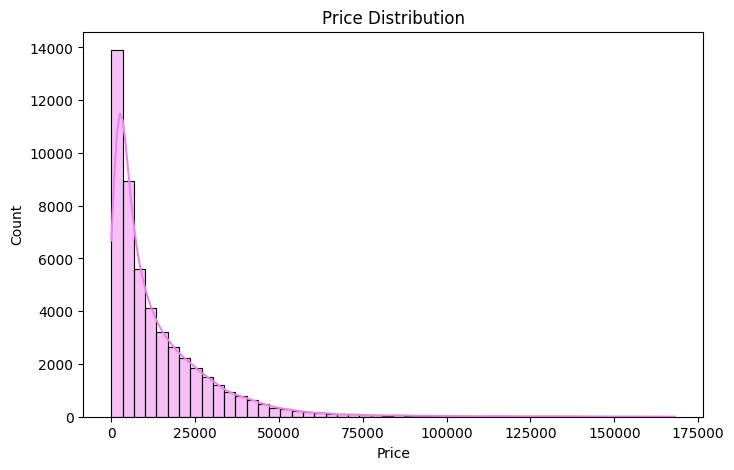

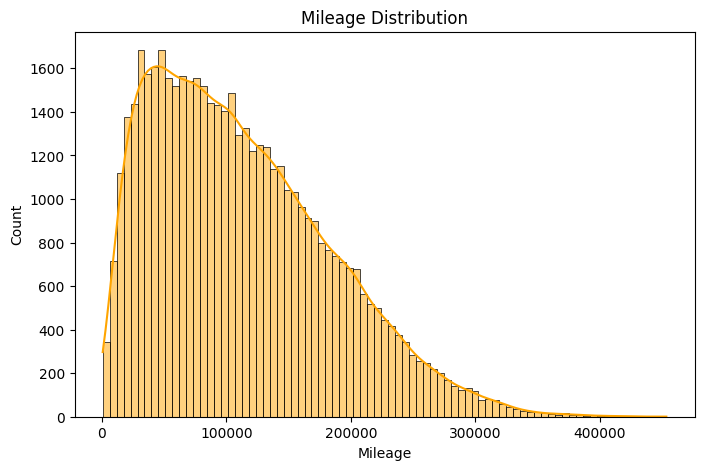

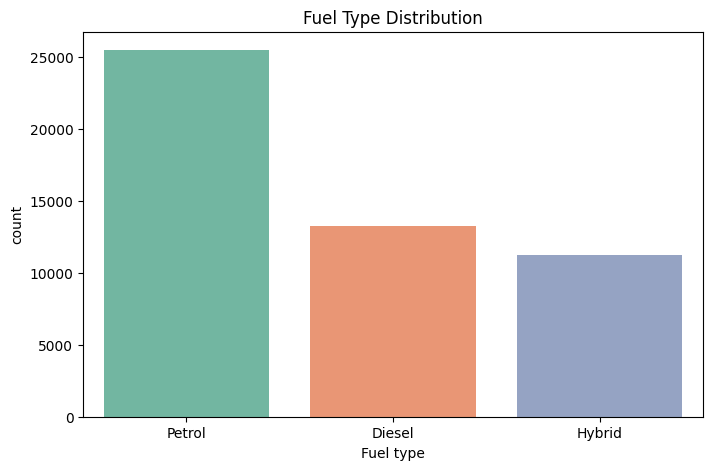

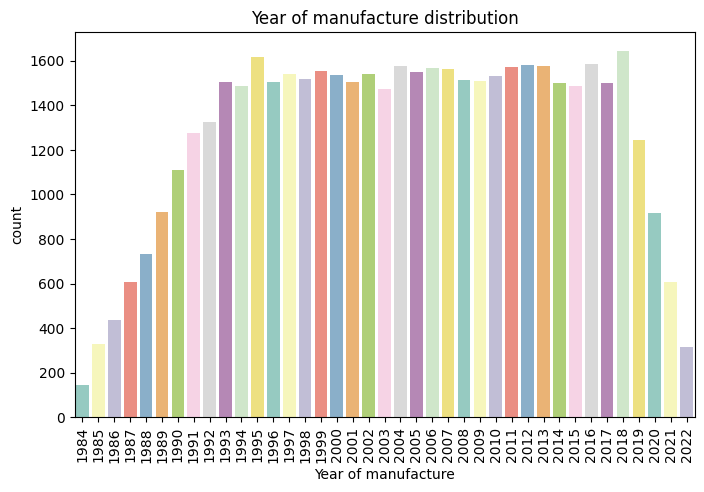

In [39]:
# 다변량 분석
# 하나의 변수만 단독으로 분석

# 가격 분석 (연속형 데이터,숫자의 분포일 때는 histplot)
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=50, color="violet")
plt.title("Price Distribution")
plt.show()

# histplot = 히스토 그램
# kde => False 일 경우 막대만, True 일 경우 막대 + 꺽은선 그래프 
####################

# 주행 거리 분석
plt.figure(figsize=(8, 5))
sns.histplot(df['Mileage'], kde=True, color="orange")
plt.title("Mileage Distribution")
plt.show()

# 연료 유형 분석 (범주형일 때는 countplot)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Fuel type", palette="Set2")
plt.title("Fuel Type Distribution")
plt.show()

# 제조 년도 분포
plt.figure(figsize=(8, 5))
sns.countplot(data=df,x="Year of manufacture", palette="Set3")
plt.title("Year of manufacture distribution")
plt.xticks(rotation=90) # x축 눈금을 90도 회전
plt.show()

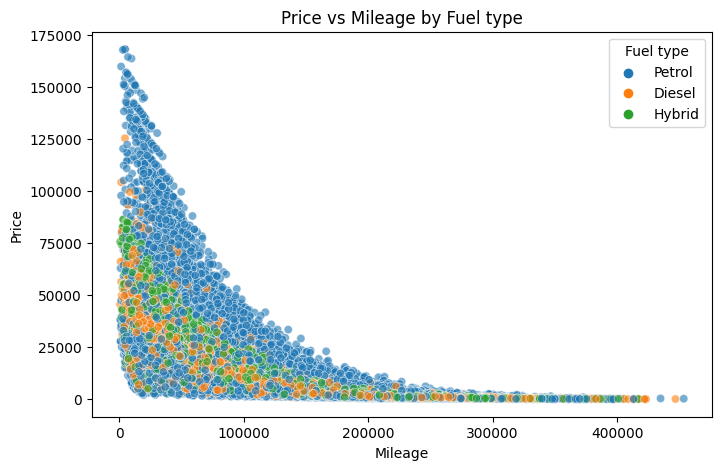

<function matplotlib.pyplot.show(close=None, block=None)>

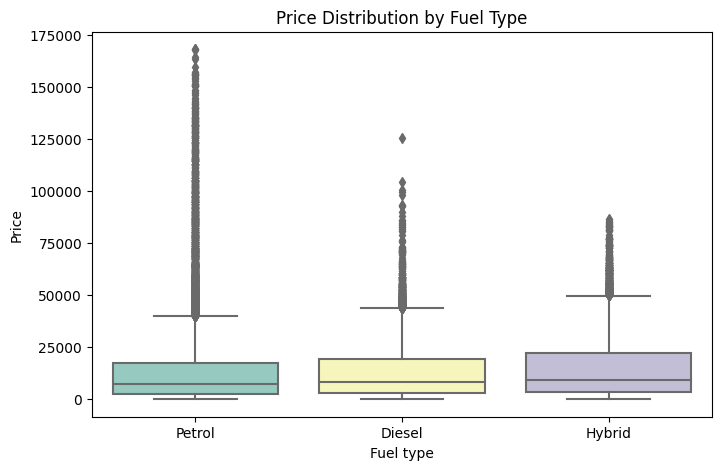

In [43]:
# 이변량 / 다변량 분석


# 가격 vs 주행 거리
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="Mileage",     # x축에 나타낼 칼럼
    y="Price",       # y축에 나타낼 칼럼
    hue="Fuel type", # 점의 색상을 다르게할 기준 칼럼 (없으면 같은 색)
    alpha = 0.6      # 점의 투명도 (0: 투명, 1: 불투명)
)
plt.title("Price vs Mileage by Fuel type")
plt.show()

# 가격 vs 연료 유형
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Fuel type", y="Price", palette="Set3")
plt.title("Price Distribution by Fuel Type")
plt.show

박스플롯
- 박스 : 25% ~ 75% 구간 나타냄
- 가운데 선 : 데이터의 중앙값
- 이상치가 아닌 값 : 0 ~ 수염의 끝
- 위에 뻗은 점들 : 수염 -> 이상치


In [ ]:
# 상호작용형 그래프